<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/03_Introduction_to_Raster_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lesson 1. What is Raster Data
<hr>

Raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is composed of regular grid of cells, all of which are the same size.

You’ve looked at and used rasters before if you’ve looked at photographs or imagery in a tool like Google Earth. However, the raster files that you will work with are different from photographs in that they are spatially referenced. Each pixel represents an area of land on the ground. That area is defined by the spatial <b>resolution</b> of the raster.

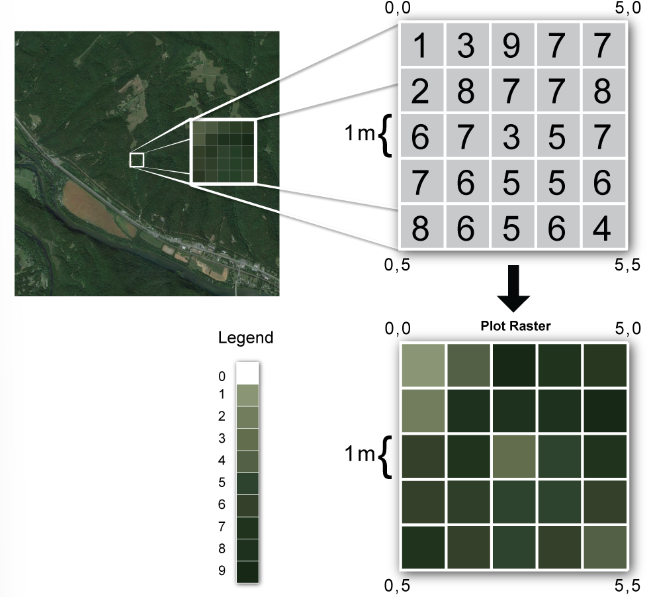

<small>
A raster is composed of a regular grid of cells. Each cell is the same size in the x and y direction
</small>

<b>Notes: </b>
- Each cell is called pixel.
- Each pixel represents an area on the ground.
- The resolution of the raster represents the area that each pixel represents on the ground. So, a 1 meter resolution raster, means that each pixel represents a 1 m by 1 m area on the ground.

A raster dataset can have attributes associated with it as well. For instance in a Lidar derived digital elevation model (DEM), each cell represents an elevation value for that location on the earth. In a LIDAR derived intensity image, each cell represents a Lidar intensity value or the amount of light energy returned to and recorded by the sensor.

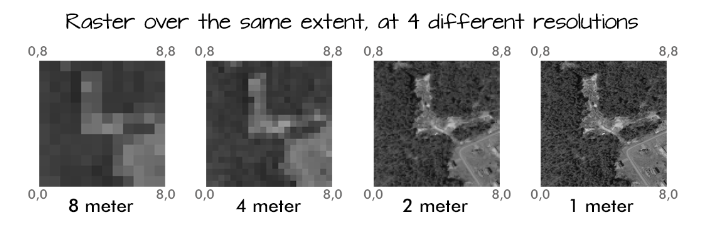

<small>Rasters can be stored at different resolutions. The resolution simply represents the size of each pixel cell.</small>

### Lesson 2. Open, Plot and Explore Raster Data with Python and Xarray
<hr>

Remember from the previous lesson that raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is composed of regular grid of cells, all of which are the same size. Raster data can be used to store many different types of scientific data including

- elevation data
- canopy height model
- surface temperature
- climate model data outputs
- landuse/landcover data

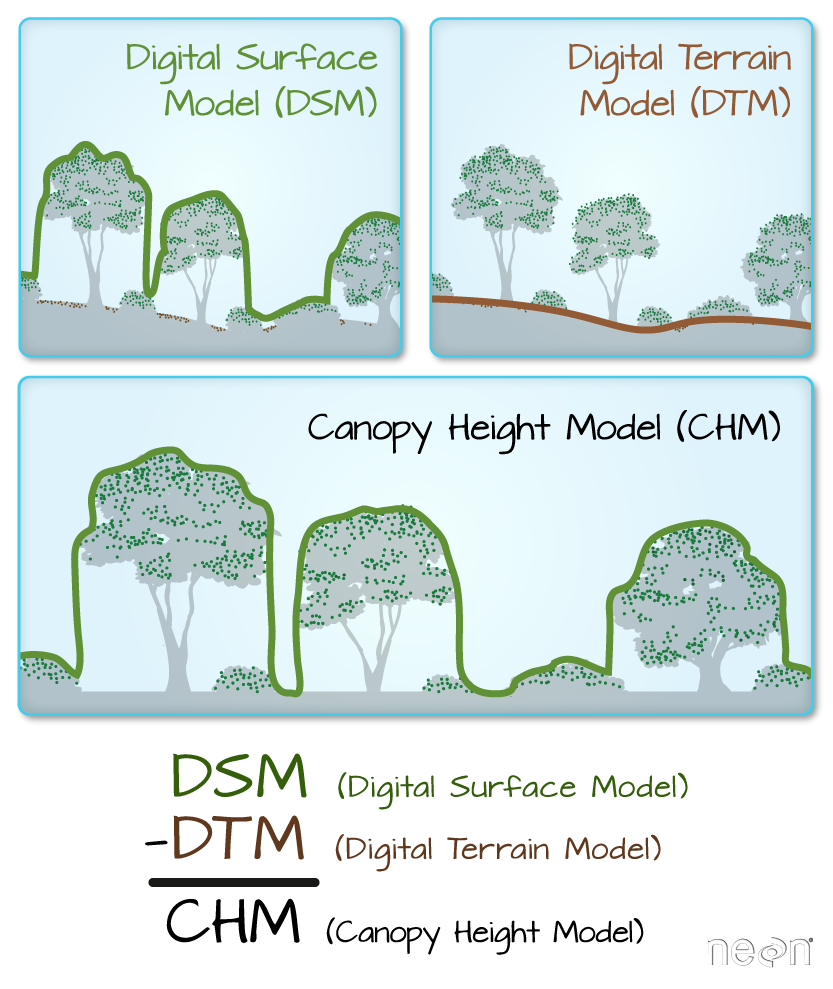

<small>
Digital Surface Model (DSM), Digital Elevation Models (DEM) and the Canopy Height Model (CHM) are the most common raster format lidar derived data products. One way to derive a CHM is to take the difference between the digital surface model (DSM, tops of trees, buildings and other objects) and the Digital Terrain Model (DTM, ground level). The CHM represents the actual height of trees, buildings, etc. with the influence of ground elevation removed. Graphic: Colin Williams, NEON

</small>

In [ ]:
!pip install earthpy
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 54.2 MB/s 
     |████████████████████████████████| 6.3 MB 36.2 MB/s 
     |████████████████████████████████| 16.7 MB 33.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=5e9eb09fd4ccb13f0e9e0b4f33d5231d6bfebe661e816ae38171ec2cbb3bca0e
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [ ]:
# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

sns.set(font_scale=1.5, style="white")

In [ ]:
# Get data and set wdr

et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Extracted output to /root/earth-analytics/data/colorado-flood/.


In [ ]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0

When you open raster data using xarray or rioxarray you are creating an `xarray.DataArray`. The. `DataArray` object stores the:

- raster data in a numpy array format
- spatial metadata including the CRS, spatial extent of the object.
- and any metadata.

When you add `rioxarray` to your package imports, you further get access to spatial data processing using `xarray` objects. Below, you can view the spatial extent (`bounds()`) and `CRS` of the data that you just opened above.

In [ ]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)


In [ ]:
# View no data value
print("The no data value is:", dtm_pre_arr.rio.nodata)

The no data value is: -3.4028235e+38


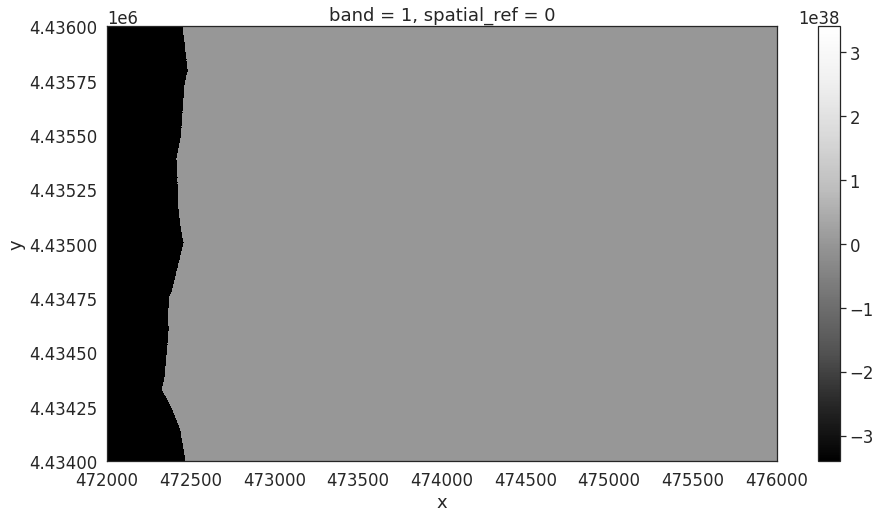

In [ ]:
dtm_pre_arr.plot(figsize=(15,8), cmap="Greys_r")
plt.show()

<small>
When a plot looks off, it is always a good idea to explore whether nodatavalues exist in your data. Often no data values are very large of negative numbers that are not likely to be valid values in your data. These values will skew any plots (or calculations) in your analysis.
</small>

The data above should represent terrain model data. However, the range of values is not what is expected. These data are for Boulder, Colorado where the elevation may range from 1000-3000m. There may be some outlier values in the data that may need to be addressed. Below you look at the distribution of pixel values in the data by plotting a histogram.

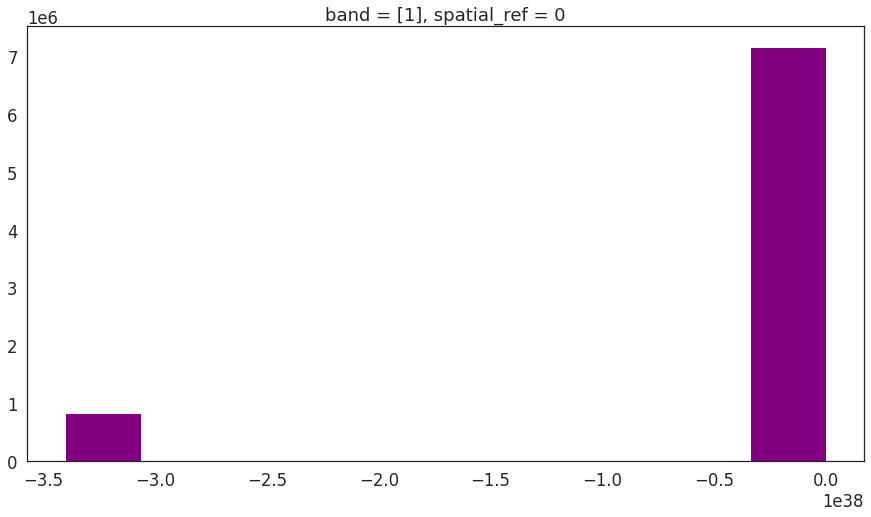

In [ ]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?

dtm_pre_arr.plot.hist(color="purple", figsize=(15,8))
plt.show()

<small>
Histogram for your lidar DTM. Notice the number of values that are below 0. This suggests that there may be no data values in the data.
<small>

Looking at the min and max values of the data, you can see a very small negative number for the minimum. This number matches the nodata value that you looked at above.

In [ ]:
print("the minimum raster value is: ", np.nanmin(dtm_pre_arr.values))
print("the maximum raster value is: ", np.nanmax(dtm_pre_arr.values))

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


#### Raster Data Exploration - Min and Max Values
<hr>
Looking at the minimum value of the data, there is one of two things going on that need to be fixed:

1. there may be no data values in the data with a negative value that are skewing your plot colors

2. there also could be outlier data in your raster

You can explore the first option - that there are no data values by reading in the data and masking no data values using the `masked=True` parameter like this: `rxr.open_rasterio(dem_pre_path, masked=True)`


Above you may have also noticed that the array has an additional dimension for the “band”. While the raster only has one layer - there is a 1 in the output of shape that could get in the way of processing.

You can remove that additional dimension using `.squeeze()`

In [ ]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [ ]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

Plot the data again to see what has changed. Now you have a reasonable range of data values and the data plot as you might expect it t

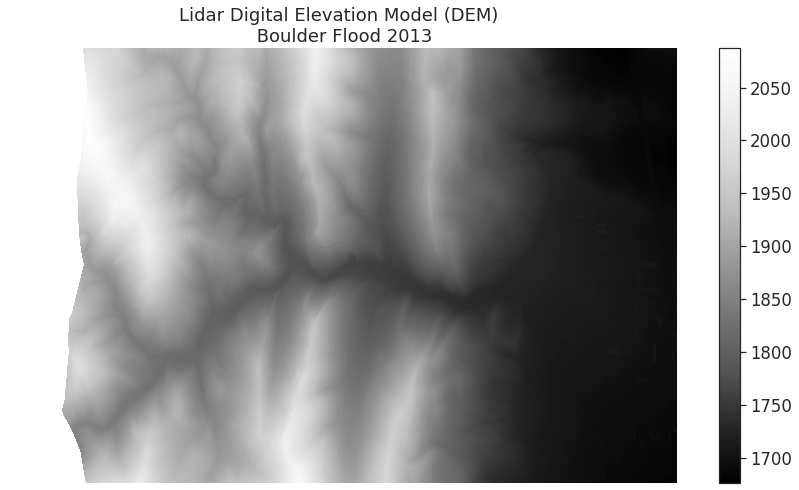

In [ ]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked

f, ax = plt.subplots(figsize=(15,8))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

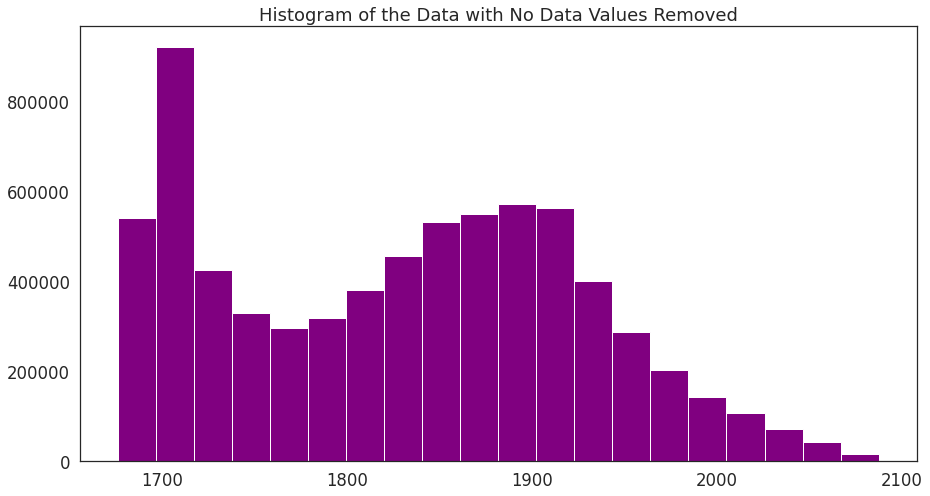

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)

ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

In [ ]:
# Check the distribution
print("The minimum raster value is: ", np.nanmin(dtm_pre_arr.data))
print("The maximum raster value is: ", np.nanmax(dtm_pre_arr.data))

The minimum raster value is:  1676.21
The maximum raster value is:  2087.43


#### Plot Raster and Vector Data Together
<hr>
If you want, you can also add shapefile overlays to your raster data plot. Below you open a single shapefile using Geopandas that contains a boundary layer that you can overlay on top of your raster dataset.

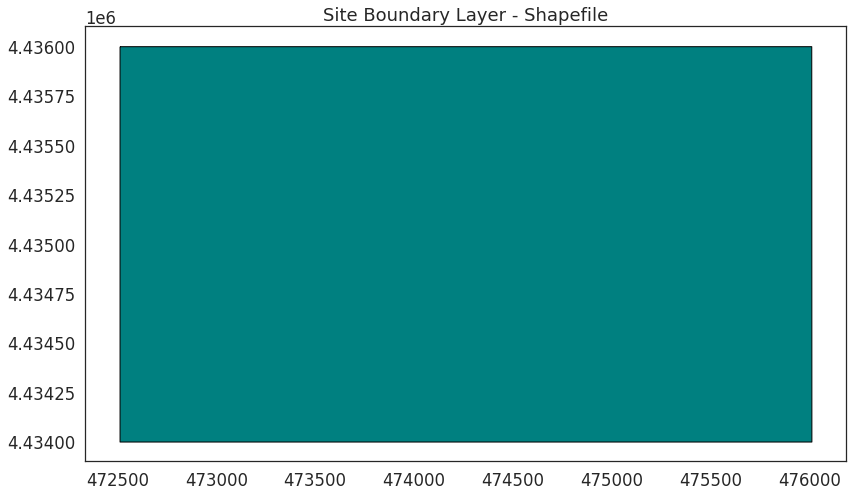

In [ ]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")

site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(15, 8))
site_bound_shp.plot(color="teal",
                    edgecolor="black",
                    ax=ax)

ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

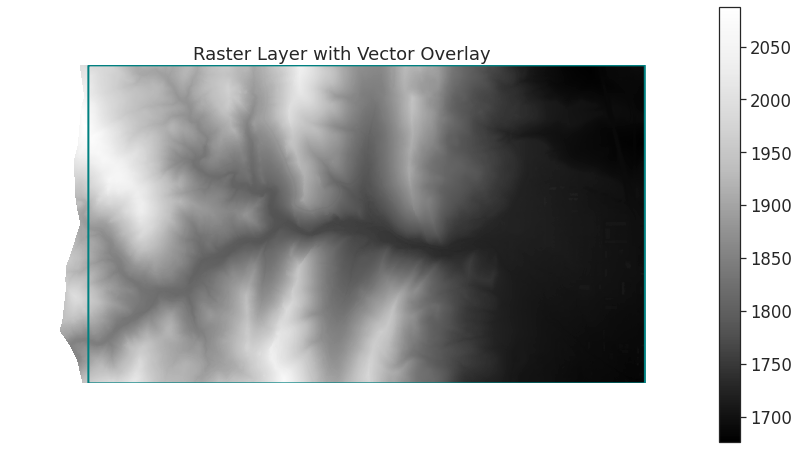

In [ ]:
f, ax = plt.subplots(figsize=(15,8))

dtm_pre_arr.plot.imshow(cmap="Greys_r",
                        ax=ax)

site_bound_shp.plot(color="None",
                    edgecolor="teal",
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

<small>
DTM raster layer with a vector study area extent overlayed on top.
</small>

### Lesson 3. Plot Histograms of Raster Values in Python
<hr>

In the last lesson, you learned about three key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems

In [ ]:
# Open again the data
lidar_dem_im = rxr.open_rasterio(dem_pre_path)
lidar_dem_im.shape

(1, 2000, 4000)

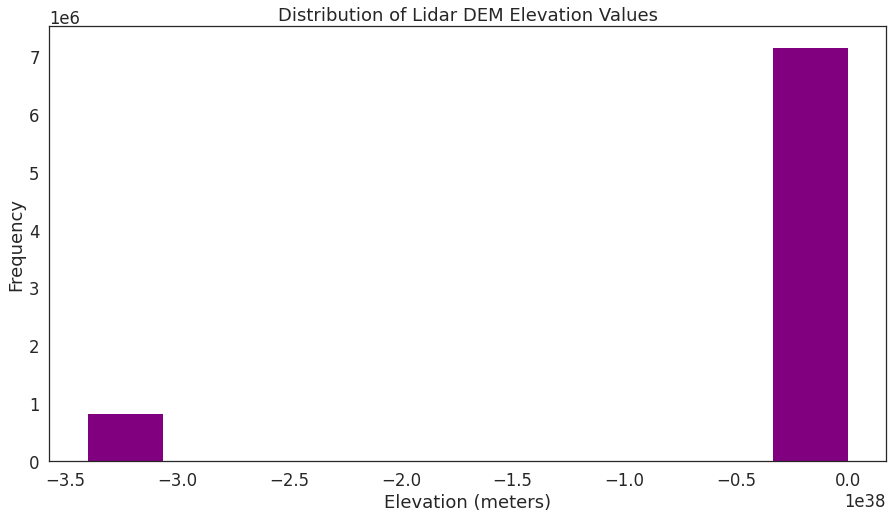

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
lidar_dem_im.plot.hist(ax=ax,
                       color="purple")
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

<small>
This plot displays a histogram of lidar dem elevation values where there is a no data value skewing the histogram. Look closely at the histogram below created after masking the nodata values from the data.
</small>

The histogram above represents the distribution of pixel elevation values in your data. This plot is useful to:

1. Identify outlier data values
2. Assess the min and max values in your data
3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat(?), hilly(?), is it high elevation or low elevation(?).

It’s often good practice to view histograms of your data before beginning to work with it as a data exploration step. Histograms will tell you a lot about the distribution of values in your data. They will also sometimes help you identify issues associated with processing your data.

To begin, look at the shape of the histogram below which represents pixel values for your lidar DEM data. Notice that there is an unusual skew to your data. Often times when you see a skew like this with many values on one side of the plot, it means that there are outlier data values in your data OR missing data values that you need to deal with.

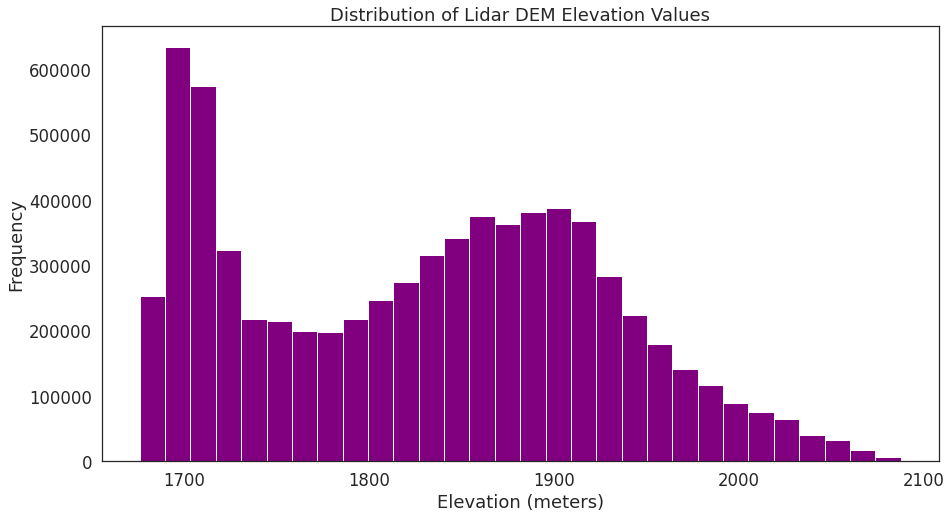

In [ ]:
# Open again the data with masking
lidar_dem_im = rxr.open_rasterio(dem_pre_path, masked=True)

f, ax = plt.subplots(figsize=(15,8))
lidar_dem_im.plot.hist(ax=ax,
                       color="purple", bins=30)
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

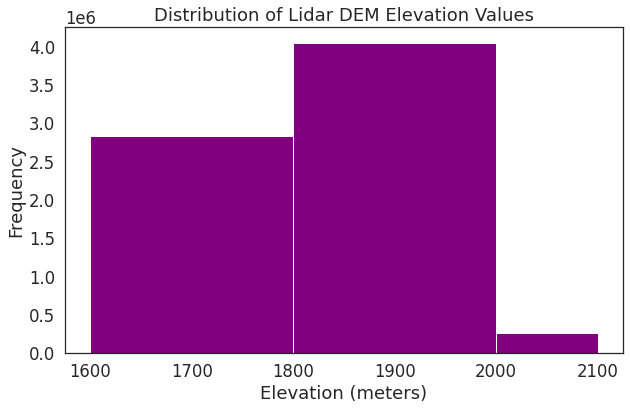

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lidar_dem_im.plot.hist(ax=ax,
                       color="purple",
                       bins=[1600, 1800, 2000, 2100])
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

### Lesson 4. Spatial Raster Metadata: CRS, Resolution, and Extent in Python
<hr>

<b>1. Coordinate Reference System</b>


The Coordinate Reference System or `CRS` of a spatial object tells `Python` where the raster is located in geographic space. It also tells Python what mathematical method should be used to “flatten” or project the raster in geographic space.

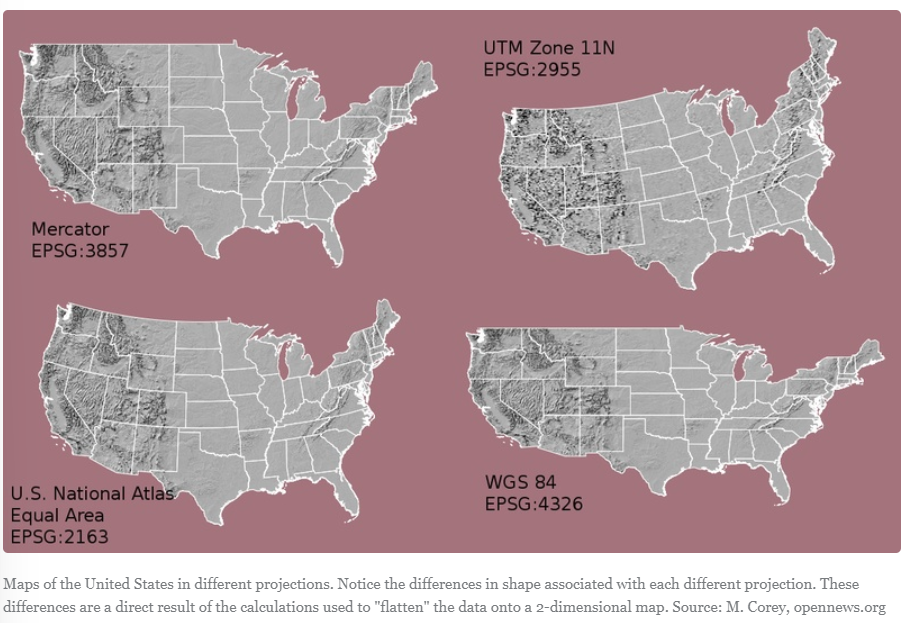

<b>What Makes Spatial Data Line Up On A Map?</b>

You will discuss Coordinate Reference systems in more detail in next weeks class. For this week, just remember that data from the same location but saved in <b>different coordinate references systems will not line up in any GIS or other program.</b>

Thus, it’s important when working with spatial data in a program like Python to identify the coordinate reference system applied to the data and retain it throughout data processing and analysis.

In [ ]:
# !pip install earthpy
# !pip install rioxarray

In [ ]:
 ## Import packages

import os

import matplotlib.pyplot as plt
import rioxarray as rxr
import earthpy as et

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [ ]:
# define relative path
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

# View CRS
lidar_dem = rxr.open_rasterio(lidar_dem_path, masked=True)
print("CRS of this data",lidar_dem.rio.crs)

CRS of this data EPSG:32613


You can assign this string to a <b>Python</b> object, too. The example below only shows the code example to set a crs for an object where it is missing and you know what the CRS should be. In this case your data already has a defined CRS so this step is not necessary.

In [ ]:
a_crs = lidar_dem.rio.crs
# Assign crs to myCRS object - this is just an example of how you would do that
lidar_dem = lidar_dem.rio.set_crs(a_crs, inplace=True)

<b>Converting EPSG to Proj4 in Python</b>
<hr>

A python package for this class called ‘earthpy’ contains a dictionary that will help you convert EPSG codes into a Proj4 string. This can be used with rasterio in order to determine the metadata for a given EPSG code. For example, if you wish to know the units of the EPSG code above, you can do the following:

In [ ]:
print(list(et.epsg.keys())[:10])

['29188', '26733', '24600', '32189', '4899', '29189', '26734', '7402', '26951', '29190']


In [ ]:
# Convert to project string using earthpy

proj4 = et.epsg['32613']
print(proj4)

+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs


- `+proj=utm` The projection of the dataset. Your data are in Universal Transverse Mercator (UTM).

- `+zone=18` The UTM projection divides up the world into zones, this element tells you which zone the data is in. Harvard Forest is in Zone 18.

- `+datum=WGS84` The datum was used to define the center point of the projection. Your raster uses the WGS84 datum.

- `+units=m` This is the horizontal units that the data are in. Your units are meters.

<small> Important: You are working with lidar data which has a Z or vertical value as well. While the horizontal units often match the vertical units of a raster they don’t always! Be sure the check the metadata of your data to figure out the vertical units!</small>

###### Spatial Extent
<hr>

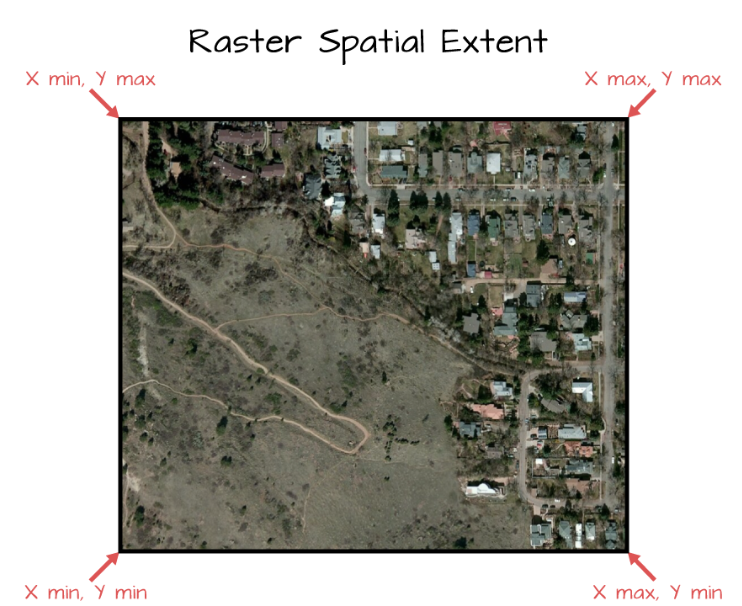

<small>The spatial extent of raster data. Notice that the spatial extent represents the rectangular area that the data cover. Thus, if the data are not rectangular (i.e. points OR an image that is rotated in some way) the spatial extent covers portions of the dataset where there are no data. Image Source: National Ecological Observatory Network (NEON).</small>

In [ ]:
lidar_dem.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [ ]:
# Raster Resolution
lidar_dem.rio.resolution()

(1.0, -1.0)

### Lesson 5. About the Geotiff (.tif) Raster File Format: Raster Data in Python

#### What is GeoTIFF?
<hr>

A GeoTIFF is a standard `.tif` or image file format that includes additional spatial (georeferencing) information embedded in the .tif file as tags. These embedded tags are called `tif tags`. These tags can include the following raster metadata:

1. <b>Spatial Extent :</b> What area does this dataset cover?

2. <b>Coordinate Reference System :</b> What spatial projection / coordinate reference system is used to store the data? Will it line up with other data?

3. <b>nodata value</b>

4. How many layers are in the .tif file

<B>Geotiffs in Python</b>

The <b>rioxarray</b> package in <b>Python</b> allows us to both open geotiff files and also to directly access .tif tags programmatically. You can quickly view the spatial <b>extent, coordinate reference system and resolution </b>of your raster data.

In [ ]:
# Get data and set wdir

et.data.get_data("colorado-flood")
os.chdir(os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data'
))

In [ ]:
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

pre_lidar_dem = rxr.open_rasterio(lidar_dem_path,
                             masked=True)

pre_lidar_dem.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [ ]:
# View generate metadata associated with the raster file
print("The crs of your data is:", pre_lidar_dem.rio.crs)
print("The nodatavalue of your data is:", pre_lidar_dem.rio.nodata)
print("The shape of your data is:", pre_lidar_dem.shape)
print("The spatial resolution for your data is:", pre_lidar_dem.rio.resolution())
print("The metadata for your data is:", pre_lidar_dem.attrs)

The crs of your data is: EPSG:32613
The nodatavalue of your data is: nan
The shape of your data is: (1, 2000, 4000)
The spatial resolution for your data is: (1.0, -1.0)
The metadata for your data is: {'scale_factor': 1.0, 'add_offset': 0.0}


In [ ]:
print("The CRS of this data is: ", pre_lidar_dem.rio.crs)
print("The spatial extent of this data is: ",pre_lidar_dem.rio.bounds())

The CRS of this data is:  EPSG:32613
The spatial extent of this data is:  (472000.0, 4434000.0, 476000.0, 4436000.0)


- Lets compare the DSM and DEM file

In [ ]:
# Define relative path to file
lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DSM.tif")

# Open lidar dsm
pre_lidar_dsm = rxr.open_rasterio(lidar_dsm_path)

In [ ]:
# Check the spatial extent
if pre_lidar_dsm.rio.bounds() == pre_lidar_dem.rio.bounds():
  print("Both datasets cover the same spatial extent.")

Both datasets cover the same spatial extent.


In [ ]:
# Check the resolution
if pre_lidar_dsm.rio.resolution() == pre_lidar_dem.rio.resolution():
  print("Both datasets cover the same resolution.")

Both datasets cover the same resolution.


<B>Extra Metadata with EPSG</b>

EPSG is short-hand way of specifying many CRS parameters at once. Each EPSG code correspondings to a Proj4 code.

To see the Proj4 parameters for a given EPSG code, you can either look them up online or use the EPSG to Proj4 dictionary:

In [ ]:
# Get crs of a crs object
print(pre_lidar_dem.rio.crs)

# You can use et.epsg lookup to get the proj4 string for an epsg code too.
# Earthpy is a python package build for you by your instructors.
# We are working on better documentation for it but for the time being you
# will find snippets of how to use it here.

print(et.epsg['32613'])


EPSG:32613
+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs


### Lesson 6. Test Your Skills: Open Raster Data Using RioXarray In Open Source Python

In [ ]:
# !pip install earthpy
# !pip install rioxarray

In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr

# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

sns.set(font_scale=1.5, style="white")

In [ ]:
# Get data and set wdir
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

<b> Challenge 1: Open And Plot Hillshade </b>

In [ ]:
# Open and plot hillshade

pre_dtm_dir = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "pre-flood",
                           "lidar",
                           "pre_DTM_hill.tif")

dtm_pre_hill = rxr.open_rasterio(pre_dtm_dir, masked=True)
dtm_pre_hill

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
dtm_pre_hill.rio.crs

CRS.from_epsg(32613)

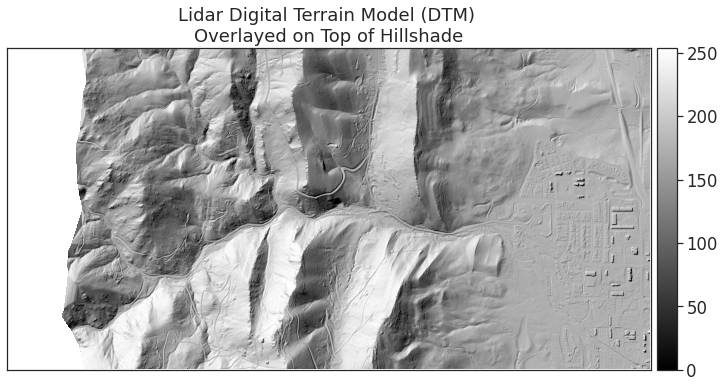

In [ ]:
ep.plot_bands(dtm_pre_hill,
              title="Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade",
              cmap="gray")

<small>Plot of a Lidar Digital Terrain Model overlayed on top of a hillshade. Your challenge 1 plot should look something like this one.</small>

<b>Challenge 2: Overlay DTM Over DTM Hillshade</b>

In [ ]:
# Overlay DTM Over DTM Hillshade
# Open DTM
dtm_pre_dirs = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "pre-flood",
                           "lidar",
                           "pre_DTM.tif")

dtm_pre = rxr.open_rasterio(dtm_pre_dirs, masked=True)

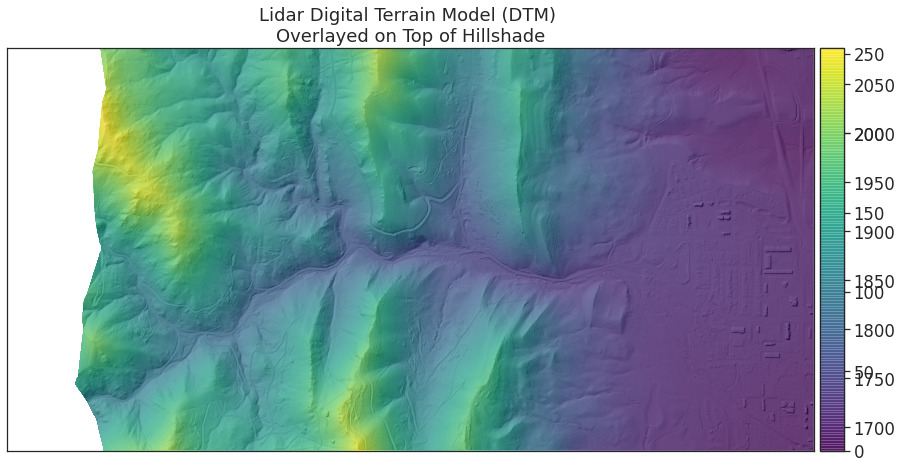

In [ ]:
f, ax = plt.subplots(figsize=(15,8))

ep.plot_bands(dtm_pre_hill,
              title="Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade",
              cmap="gray",
              ax=ax)
ep.plot_bands(dtm_pre,
              title="Lidar Digital Terrain Model (DTM) \nOverlayed on Top of Hillshade",
              cmap="viridis",
              alpha=0.7,
              ax=ax)

<b>Challenge 3: Add A Site Boundary to Your Raster Plot

<b>Challenge 4 (Optional): Open Post Flood Raster</b>

In [ ]:
dtm_pre_flood_path = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "pre-flood",
                           "lidar",
                           "pre_DTM.tif")

dtm_pre_flood = rxr.open_rasterio(dtm_pre_flood_path, masked=True)

dtm_post_flood_path = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "post-flood",
                           "lidar",
                           "post_DTM.tif")

dtm_post_flood = rxr.open_rasterio(dtm_post_flood_path, masked=True)

In [ ]:
pre_dtm_hill = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "pre-flood",
                           "lidar",
                           "pre_DTM_hill.tif")

dtm_pre_hill = rxr.open_rasterio(pre_dtm_hill, masked=True)

post_dtm_hill = os.path.join("colorado-flood",
                           "spatial",
                           "boulder-leehill-rd",
                           "post-flood",
                           "lidar",
                           "post_DTM_hill.tif")

dtm_post_hill = rxr.open_rasterio(post_dtm_hill, masked=True)

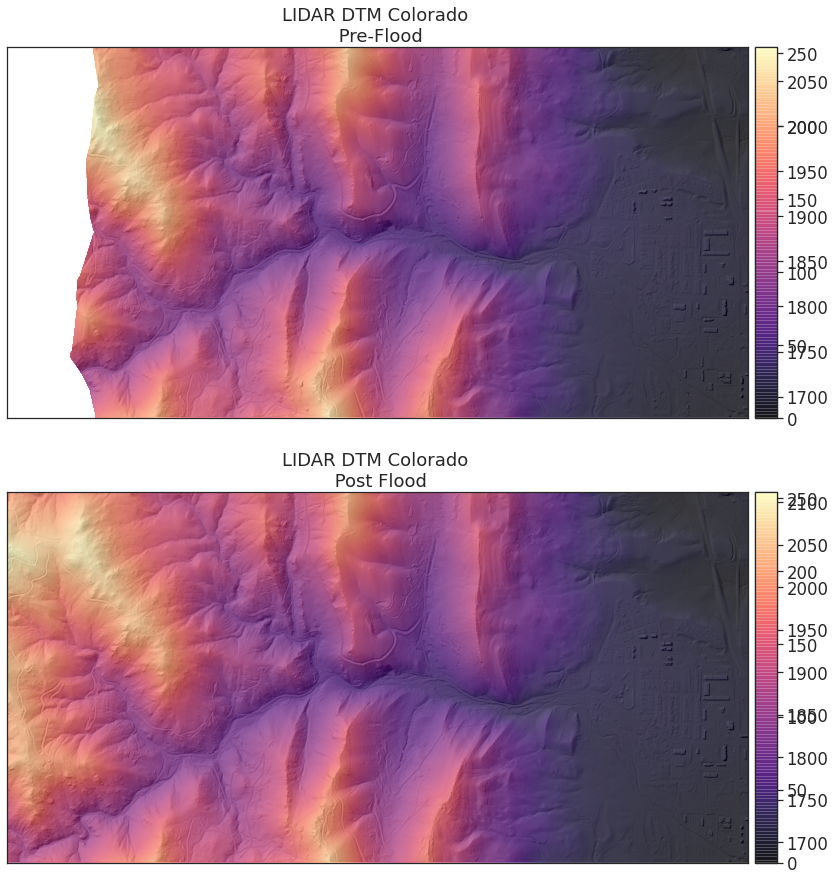

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15, 15))

ep.plot_bands(dtm_pre_hill,
              cmap="gray",
              ax=ax[0])
ep.plot_bands(dtm_pre_flood, cmap="magma", ax=ax[0], alpha=0.7, title="LIDAR DTM Colorado \n Pre-Flood")

ep.plot_bands(dtm_post_hill,
              cmap="gray",
              ax=ax[1])
ep.plot_bands(dtm_post_flood, cmap="magma", ax=ax[1], alpha=0.7,title="LIDAR DTM Colorado \n Post Flood")

plt.show()

### Lesson 7. Open, Plot and Explore Raster Data with Python
<hr>

Remember from the previous lesson that raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is composed of regular grid of cells, all of which are the same size. Raster data can be used to store many different types of scientific data including

- elevation data
- canopy height models
- surface temperature
- climate model data outputs
- landuse/landcover data
- and more.

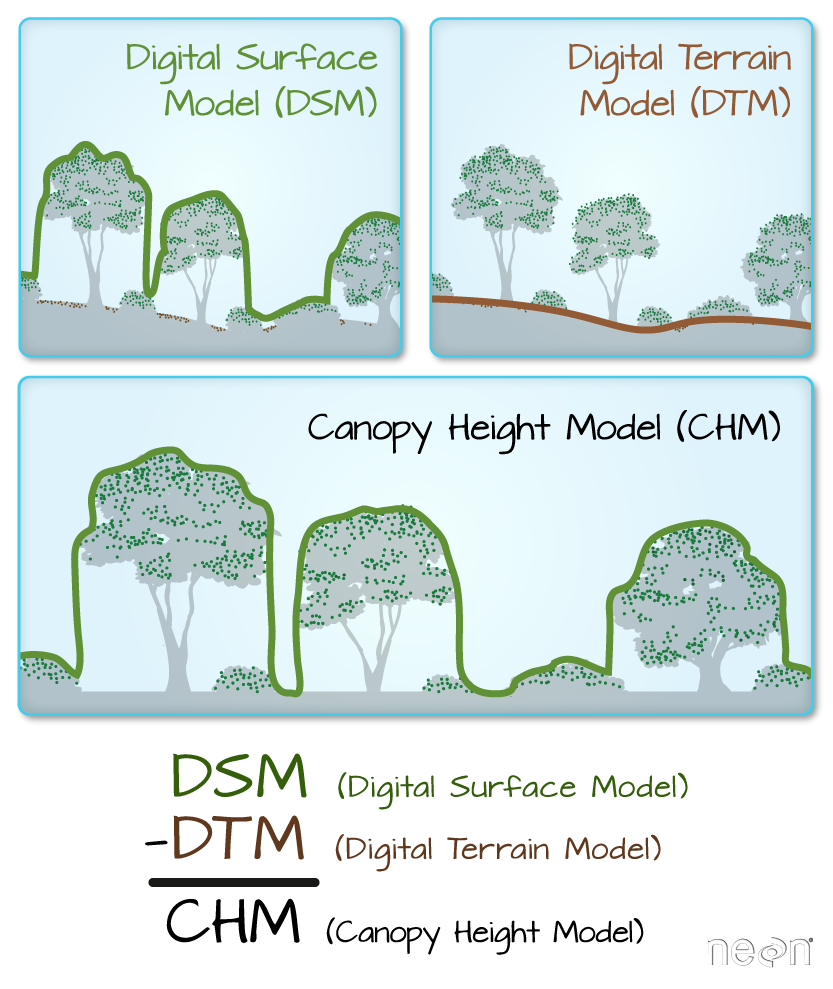

In [ ]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [ ]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [ ]:
# Define relative path for DEM
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

# Open the file using context manager
with rio.open(dem_pre_path) as dem_src:
  dtm_pre_arr = dem_src.read(1)

When you open raster data using <b>rasterio</b> you are creating a numpy array. Numpy is an efficient way to work with and process raster format data. You can plot your data using earthpy `plot_bands()` which takes a numpy array as an input and generates a plot.

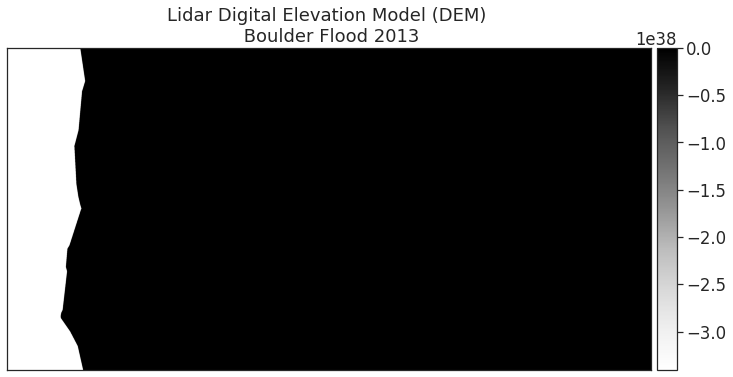

In [ ]:
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

The data above should represent terrain model data. However, the range of values is not what is expected. These data are for Boulder, Colorado where the elevation may range from 1000-3000m.

There may be some outlier values in the data that may need to be addressed. Below you check out the min and max values of the data.

In [ ]:
print("Min raster value: ", dtm_pre_arr.min())
print("Max raster value: ", dtm_pre_arr.max())

Min raster value:  -3.4028235e+38
Max raster value:  2087.43


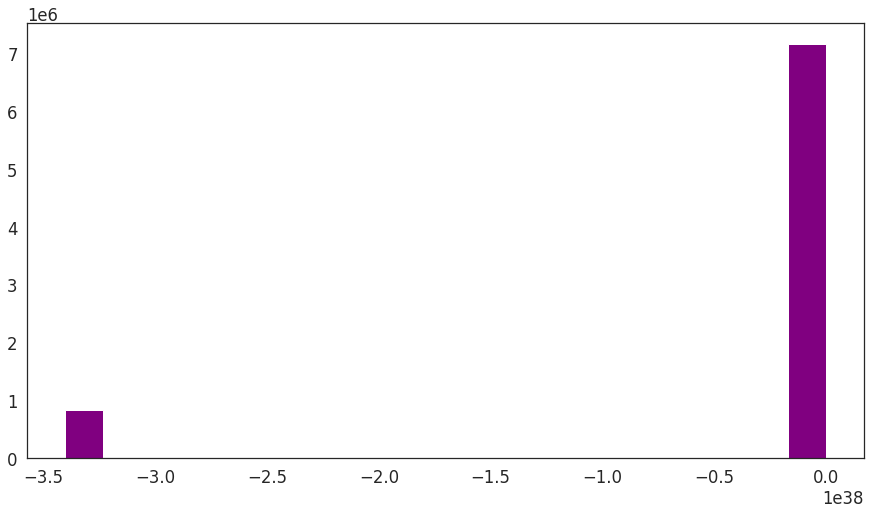

In [ ]:
# Plot using histogram
ep.hist(dtm_pre_arr,
        figsize=(15,8))
plt.show()

In [ ]:
with rio.open(dem_pre_path) as dem_src:
  dtm_pre_arr = dem_src.read(1, masked=True)

Min raster value:  1676.21
Max raster value:  2087.43


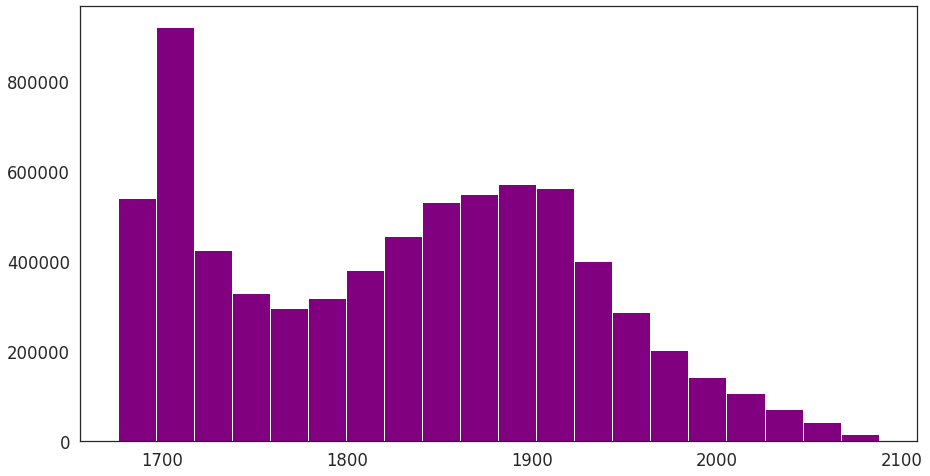

In [ ]:
print("Min raster value: ", dtm_pre_arr.min())
print("Max raster value: ", dtm_pre_arr.max())

# Plot using histogram
ep.hist(dtm_pre_arr,
        figsize=(15,8))
plt.show()

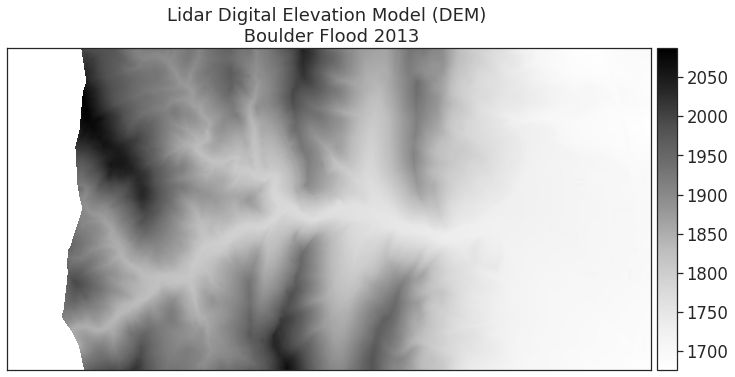

In [ ]:
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

### Rasterio Reads Files into Python as Numpy Array
<hr>

When you call `src.read()` above, rasterio is reading in the data as a numpy array. A numpy array is a matrix of values. Numpy arrays are an efficient structure for working with large and potentially multi-dimensional (layered) matrices.

The numpy array below is type numpy.ma.core.MaskedArray. It is a masked array because you chose to mask the no data values in your data. Masking ensures that when you plot and perform other math operations on your data, those no data values are not included in the operations.


In [ ]:
with rio.open(dem_pre_path) as dem_src:
  lidar_dem_im = dem_src.read(1, masked=True)

print("Numpy Array Shape: ", lidar_dem_im.shape)
print("Object type: ", type(lidar_dem_im))

Numpy Array Shape:  (2000, 4000)
Object type:  <class 'numpy.ma.core.MaskedArray'>


A numpy array does not by default store spatial information. However, your raster data is spatial - it represents a location on the earth’s surface.

You can acccess the spatial metadata within the context manager using dem_src.profile. Notice that the .profile object contains information including the no data values for your data, the shape, the file type and even the coordinate reference system.

In [ ]:
# accessing the metadata
from pprint import pprint as ptt
with rio.open(dem_pre_path) as dem_src:
  lidar_dem_im = dem_src.read(1, masked=True)
  lidar_dem_meta = dem_src.profile

ptt(lidar_dem_meta)

{'blockxsize': 128,
 'blockysize': 128,
 'compress': 'lzw',
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 2000,
 'interleave': 'band',
 'nodata': -3.4028234663852886e+38,
 'tiled': True,
 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0),
 'width': 4000}


<b>Context Managers to Open and Close File Connections</b>
<hr>

The steps above represent the steps you need to open and plot a raster dataset using rasterio in python. The `with rio.open()` statement creates what is known as a context manager. A context manager allows you to open the data and work with it. Within the context manager, Python makes a temporary connection to the file that you are trying to open.

In the example above this was a file called `pre_DTM.tif`.

To break this code down, the context manager has a few parts. First, it has a `with` statement. The `with` statement creates a connection to the file that you want to open. The default connection type is read only. This means that you can NOT modify that file by default. Not being able to modify the original data is a good thing because it prevents you from making unintended changes to your original data.



In [ ]:
lidar_dem_im

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

Because you created an object within the context manager that contains those raster values as a numpy array, you can now access the data values without needing to have an open connection to your file. This ensures once again that you are not modifying your original file and that all connections to it are closed. You are now free to play with the numpy array and process your data!

In [ ]:
with rio.open(dem_pre_path) as dem_src:
    # Create an object called lidar_dem_plot_ext that contains the spatial metadata
    lidar_dem_plot_ext = plotting_extent(dem_src)

# This plotting extent object will be used below to ensure your data overlay correctly
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

Plot Raster and Vector Data Together: Plot Extents

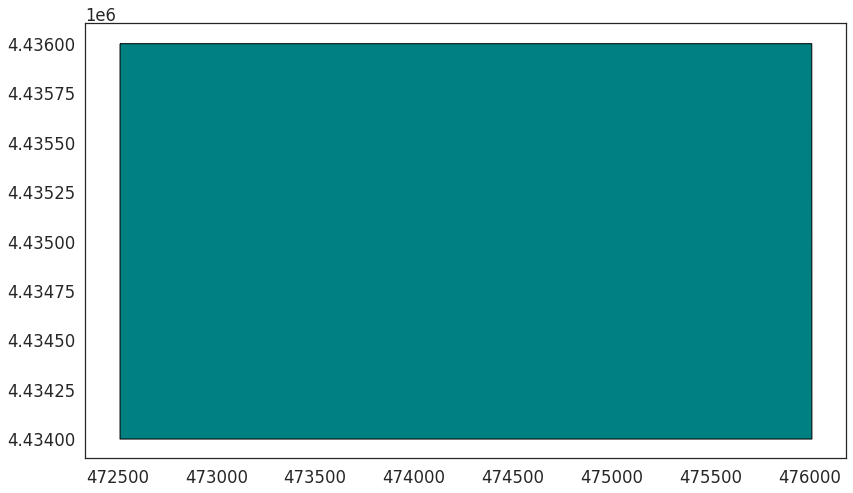

In [ ]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
site_bound_shp.plot(color='teal',
                    edgecolor='black', figsize=(15,8))
plt.show()

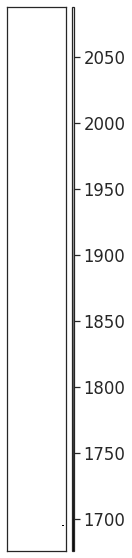

In [ ]:
# You can try to plot the two datasets together but you will see below that the
#  output plot does not look correct. This is because the raster layer has no
#  spatial information associated with it.


fig, ax = plt.subplots(figsize=(4, 10))

ep.plot_bands(dtm_pre_arr, ax=ax)

site_bound_shp.plot(color='teal',
                    edgecolor='black', ax=ax)

plt.show()

In [ ]:
with rio.open(dem_pre_path) as dem_src:
  lidar_dem_im = dem_src.read(1, masked=True)
  lidar_dem_plot_extent = plotting_extent(dem_src)

with rio.open(pre_dtm_hill) as dem_pre_hill:
  lidar_dem_hill = dem_pre_hill.read(1, masked=True)
  lidar_dem_plot_extent = plotting_extent(dem_src)

print(lidar_dem_plot_extent)

(472000.0, 476000.0, 4434000.0, 4436000.0)


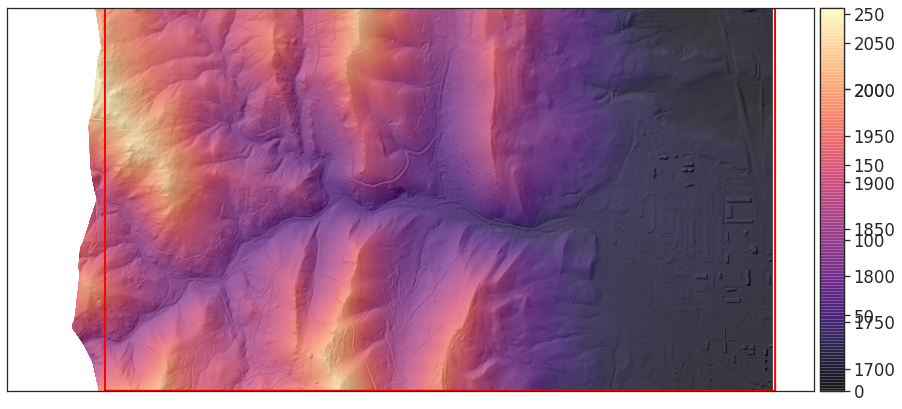

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ep.plot_bands(lidar_dem_hill,
              ax=ax,
              extent=lidar_dem_plot_ext,
              cmap="gray")

ep.plot_bands(dtm_pre_arr,
              ax=ax,
              extent=lidar_dem_plot_ext,
              cmap="magma",
              alpha=0.7)

site_bound_shp.plot(color='None',
                    edgecolor='red',
                    linewidth=2,
                    ax=ax)



plt.show()